In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import fmin
import scipy.stats as si
from scipy.stats import norm
from scipy.optimize import minimize
import numpy as np
from scipy.stats import norm
from scipy.optimize import fsolve
from matplotlib import pyplot as plt

In [ ]:
# Parameters
T = 1/4

In [ ]:
# Import Data
df = pd.read_excel("10Y_Asset_Liability_Data_T.xlsx")
df.set_index('Date', inplace=True)
df_formatted = df.style.format("{:,.2f}")
df_formatted

In [ ]:
df_realised_default = pd.read_excel("time_series_default_prob.xlsx")
df_realised_default.set_index('Date', inplace=True)
interest_rate = pd.read_excel("Interest Rate 10 Year.xlsx")
interest_rate.set_index('Date', inplace=True)


In [ ]:
equity_price_df=pd.read_excel("equity_price_values.xlsx")
equity_price_df.set_index('Date', inplace=True)
equity_price_df = equity_price_df.resample('3M').mean()


In [ ]:
cds_spread = pd.read_excel("CDS_Spread_Data.xlsx")
cds_spread.set_index('Date', inplace=True)
cds_spread = cds_spread.resample('3M').mean()
cds_spread

PFE        BAX         XRX        BXP  VNO         APA  OVV  \
Date                                                                            
2013-12-31  21.069000  20.026000         NaN        NaN  NaN   45.442000  NaN   
2014-03-31  21.996136  23.237373  103.177105  73.781068  NaN   59.031245  NaN   
2014-06-30  26.550062  26.688215   92.968474  60.314016  NaN   49.439256  NaN   
2014-09-30  23.819759  28.071155   88.592510  59.538529  NaN   53.688204  NaN   
2014-12-31  20.967250  23.951848   80.357476  62.397275  NaN  124.368189  NaN   
2015-03-31  16.043813  22.196359   78.356984  56.208448  NaN  162.840792  NaN   
2015-06-30  16.704662  33.239646  100.419708  54.970375  NaN  106.530944  NaN   
2015-09-30  24.390897  39.764672  120.955934  64.012200  NaN  167.181442  NaN   
2015-12-31  29.460919  46.279848  172.806953        NaN  NaN  164.307625  NaN   
2016-03-31  18.843703  34.225219  243.331031        NaN  NaN  277.112255  NaN   
2016-06-30  24.573108  34.035554  274.903354        NaN  NaN  183.880965  NaN   
2016-09-30  24.015967  29.786067  232.571683        NaN  NaN  163.689415  NaN   
2016-12-31  37.695846  30.340538  165.756629        NaN  NaN  126.270778  NaN   
2017-03-31  38.307953  26.584391  135.977109        NaN  NaN  100.395523  NaN   
2017-06-30  29.413800  21.799092  125.533631        NaN  NaN  109.285154  NaN   
2017-09-30  23.683138  23.377754   89.234323  86.826444  NaN  107.530123  NaN   
2017-12-31  22.375369  21.956215  159.974985        NaN  NaN   92.852400  NaN   
2018-03-31  23.437703  26.961359  119.133554  65.775000  NaN   83.598787  NaN   
2018-06-30  34.894500  32.569804  164.933323        NaN  NaN   91.667731  NaN   
2018-09-30  28.785306  31.417097  209.155000        NaN  NaN   80.720356  NaN   
2018-12-31  30.594812  46.541266  281.601515        NaN  NaN  117.574951  NaN   
2019-03-31  30.283729  44.117896  241.035422        NaN  NaN  133.027468  NaN   
2019-06-30        NaN        NaN  224.251754        NaN  NaN         NaN  NaN   
2019-09-30        NaN        NaN  184.143939        NaN  NaN         NaN  NaN   
2019-12-31        NaN        NaN  163.765875        NaN  NaN         NaN  NaN   
2020-03-31  39.249267  41.431750  156.560823        NaN  NaN  678.087706  NaN   
2020-06-30  22.728266  18.885274  271.251594        NaN  NaN  493.668000  NaN   
2020-09-30  19.037788  16.977538  275.491769        NaN  NaN  302.821667  NaN   
2020-12-31  22.646636  19.285955  194.560308        NaN  NaN  181.337500  NaN   
2021-03-31  29.389766  27.030656  177.729328        NaN  NaN         NaN  NaN   
2021-06-30  29.267754  26.278813  207.835359  89.187750  NaN  198.248500  NaN   
2021-09-30  25.820424  29.448141  225.236828  87.525500  NaN  212.308000  NaN   
2021-12-31  27.151576  33.363231  265.041154        NaN  NaN         NaN  NaN   
2022-03-31  32.009952  38.543550  289.357935        NaN  NaN  157.987107  NaN   
2022-06-30  42.578321        NaN  430.228113        NaN  NaN  185.974923  NaN   
2022-09-30  38.773076  67.870451  461.622300        NaN  NaN  252.452242  NaN   
2022-12-31  42.613385  69.432852  440.556614        NaN  NaN  190.466246  NaN   
2023-03-31  43.566308  85.236034  396.301121        NaN  NaN  192.616769  NaN   
2023-06-30  41.559415  83.424554  407.356393        NaN  NaN  198.338369  NaN   
2023-09-30  35.227385  72.779200  330.582283        NaN  NaN  144.291138  NaN   

                  ALLY         MBI  
Date                                
2013-12-31  143.943000  548.984000  
2014-03-31  135.678672  455.145762  
2014-06-30  131.791354         NaN  
2014-09-30  148.001636  507.392095  
2014-12-31  167.126662  464.795138  
2015-03-31  171.091734  562.730516  
2015-06-30  177.560785  539.595092  
2015-09-30  179.722446  738.404921  
2015-12-31  189.571667  713.429944  
2016-03-31  210.848333         NaN  
2016-06-30  288.995238  847.742000  
2016-09-30  243.327687         NaN  
2016-12-31  230.893500  591.317400  
2017-03-31  207.144704         NaN  
2017-06-30  234.213734 

In [ ]:
# Merton Model Function
def MertonModel(c):
  d1 = (np.log(A/K) + (r + c[1]**2/2)*T)/(c[1] * np.sqrt(T))
  d2 = d1 - c[1] * np.sqrt(T)
  res1 = A* norm.cdf(d1) - np.exp(-r*T) * K * norm.cdf(d2) - c[0]
  res2 = (E_vol * norm.cdf(d1) * c[0]) - A*c[1]
  return(res1**2+res2**2)

In [ ]:
# Default Probability Function
def default_prob(A, K, A_vol, T, r):
  dd = (np.log(A/K) + (r-(A_vol**2)/2)*T)/(A_vol * np.sqrt(T))
  return norm.cdf(-dd)

In [ ]:
# Define the company names and corresponding columns in the DataFrame
companies = ['PFE', 'BAX', 'XRX', 'BXP', 'VNO', 'APA', 'OVV', 'ALLY', 'MBI']
columns = {'equity_value': [0, 3, 6, 9, 12, 15, 18, 21, 24],
           'asset_vol': [2, 5, 8, 11, 14, 17, 20, 23, 26]}

# Initialize lists for equity values and asset volatilities
equity_values = {company: [] for company in companies}
asset_vols = {company: [] for company in companies}

# Loop through the DataFrame and calculate equity values and asset volatilities
for i in range(len(df)):
    for company in companies:
        A = df.iloc[i][columns['equity_value'][companies.index(company)]]
        K = df.iloc[i][columns['equity_value'][companies.index(company)] + 1]
        E_vol = df.iloc[i][columns['asset_vol'][companies.index(company)]]
        r=interest_rate["Interest Rate"].iloc[i]
        c = fmin(MertonModel, [A - K, E_vol])
        equity_values[company].append(c[0])
        asset_vols[company].append(c[1])

# Example: Accessing the results for a specific company
equity_values = pd.DataFrame(equity_values)
asset_vols = pd.DataFrame(asset_vols)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 115
         Function evaluations: 217
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 109
         Function evaluations: 210
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 108
         Function evaluations: 207
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 107
         Function evaluations: 205
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 103
         Function evaluations: 197
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 109
         Function evaluations: 210
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 112
         Function evaluations: 213
Optimization termina

In [ ]:
equity_values_formatted = equity_values.style.format("{:,.2f}")
equity_values_formatted

In [ ]:
asset_vols_formatted = asset_vols.style.format("{:,.2f}")
asset_vols_formatted

In [ ]:
# Initializing Default Probability dictionary for each company
default_probs = {company: [] for company in companies}
column_names = ['PFE', 'BAX', 'XRX', 'BXP', 'VNO', 'APA', 'OVV', 'ALLY', 'MBI']


# Storing Default Probability values into the dictionary
for i in range(len(df)):
    for company in companies:
        equity_col, asset_vol_col = columns['equity_value'][companies.index(company)], columns['asset_vol'][companies.index(company)]
        default_probs[company].append(default_prob(df.iloc[i][equity_col], df.iloc[i][equity_col + 1], asset_vols[company][i], 4, interest_rate["Interest Rate"].iloc[i]))

# Convert the lists in the dictionary to NumPy arrays and multiply by 100
default_probs = {company: np.array(default_probs[company]) * 100 for company in companies}
default_probs = pd.DataFrame(default_probs, index = df.index)
default_probs.index = pd.to_datetime(default_probs.index)
default_probs

PFE        BAX        XRX        BXP        VNO  \
Date                                                                   
2013-12-31  1.399688e-06   0.000002   0.087148   0.001594   0.000022   
2014-03-31  9.165142e-03   0.000048   0.113185   0.000097   0.000045   
2014-06-30  6.199367e-08   0.000167   0.067652   0.000005   0.000003   
2014-09-30  4.396079e-05   0.000003   0.047536   0.000104   0.000006   
2014-12-31  1.006062e-03   0.000047   0.076748   0.000047   0.000012   
2015-03-31  3.294520e-04   0.000041   0.113055   0.000599   0.000452   
2015-06-30  1.230387e-03   0.000342   0.408370   0.013060   0.004623   
2015-09-30  1.060121e+00   2.283507   7.473093   0.092140   0.079966   
2015-12-31  2.437912e-03   0.144657   2.867032   0.039221   0.005019   
2016-03-31  1.915262e-03   0.023775   0.832915   0.013201   0.010194   
2016-06-30  1.121099e-04   0.022994   1.315317   0.021977   0.007282   
2016-09-30  5.919231e-04   0.005125   0.299487   0.025090   0.025810   
2016-12-31  1.954954e-02   0.030295   2.882274   0.373447   0.120078   
2017-03-31  7.291610e-05   0.005586   0.620074   0.009405   0.002193   
2017-06-30  1.567954e-05   0.003541   0.375931   0.004184   0.006045   
2017-09-30  4.990998e-06   0.000436   0.027928   0.000154   0.001021   
2017-12-31  2.368170e-06   0.000037   0.075205   0.000046   0.000029   
2018-03-31  3.545812e-03   0.015215   0.918516   0.030011   0.053018   
2018-06-30  8.361184e-06   0.003756   3.504826   0.002703   0.002865   
2018-09-30  1.888995e-06   0.000007   1.197088   0.000487   0.000430   
2018-12-31  1.241519e-01   0.847292   8.862634   0.221497   0.191758   
2019-03-31  4.194232e-04   0.005324   0.502084   0.000059   0.000629   
2019-06-30  1.647074e-03   0.015673   0.401136   0.005577   0.001457   
2019-09-30  5.685629e-02   0.061304   1.607806   0.012289   0.005228   
2019-12-31  1.365270e-03   0.010002   1.524672   0.000139   0.000069   
2020-03-31  1.137033e+00  14.022544  23.975369  14.551906  20.740717   
2020-06-30  1.413535e+00   0.840203  17.515825   8.691892  16.228019   
2020-09-30  1.145437e+00   0.797744   7.849084   4.042085  10.321497   
2020-12-31  5.476680e-01   0.499819   5.833922   7.959785  12.983352   
2021-03-31  2.525084e-03   3.870160   3.086320   1.717875   4.773007   
2021-06-30  1.570110e-02   0.361821   2.162760   0.220951   1.054998   
2021-09-30  1.559163e-01   0.804535   3.816630   0.496819   1.352837   
2021-12-31  1.758828e+00   0.132271   2.238802   0.095187   0.963860   
2022-03-31  2.627586e-01   1.036512   2.999175   0.103640   0.773921   
2022-06-30  1.440222e+00   1.940874   9.380287   2.893436   5.707526   
2022-09-30  1.184983e+00   3.023893  10.980803   3.811146   8.216871   
2022-12-31  1.901608e-01   0.940711   7.013435   1.367845   4.900436   
2023-03-31  1.610103e-02   3.261138   3.581865   7.502746  22.580354   
2023-06-30  2.080765e-03   0.759800   4.704842   2.474583  13.025861   
2023-09-30  8.983657e-02   0.428632   2.656643   2.403153   9.167507   

                   APA        OVV          ALLY         MBI  
Date                                                         
2013-12-31    0.001283   0.009418  1.118176e-07    2.860605  
2014-03-31    0.001192   0.160904  4.541250e-06    1.075534  
2014-06-30    0.045965   0.174412  2.455771e-05    1.134329  
2014-09-30    0.018944   0.627164  1.590885e-06    1.214502  
2014-12-31    2.674210   7.210100  4.250830e-03    0.351836  
2015-03-31    0.712840   3.179015  1.606685e-02    2.039248  
2015-06-30    0.587857   3.424803  1.249465e-03   36.086681  
2015-09-30    9.882288  19.283871  6.006379e-01   20.328952  
2015-12-31    6.175834  24.864346  4.173607e-01   22.289363  
2016-03-31    7.852091  28.150608  5.036920e-01    9.980642  
2016-06-30    3.262739  17.460652  4.598852e-01   12.446871  
2016-09-30    4.273135  16.674677  4.294850e-01    6.750449  
2016-12-31    2.400750   8.239511  1.048412e+00    6.250824  
2017-03-31    1.069769   7.358671  3.917649e-01    6.876864  
2017

In [ ]:
# Creating a Data Frame for threshold
thresholds = df_realised_default.copy()
thresholds.index = pd.to_datetime(thresholds.index)
thresholds = thresholds.resample('3M').mean()
# Create DataFrames for above and below thresholds with the date index
above_thresholds_df = pd.DataFrame(index=default_probs.index)
below_thresholds_df = pd.DataFrame(index=default_probs.index)

# Iterate through columns and create above and below threshold signals
for i in range(len(default_probs)):
  for col in thresholds.columns:
    above_thresholds_df.loc[default_probs.index[i], col] = default_probs.loc[default_probs.index[i], col] > thresholds.loc[thresholds.index[i], col]
    below_thresholds_df.loc[default_probs.index[i], col] = default_probs.loc[default_probs.index[i], col] < thresholds.loc[thresholds.index[i], col]

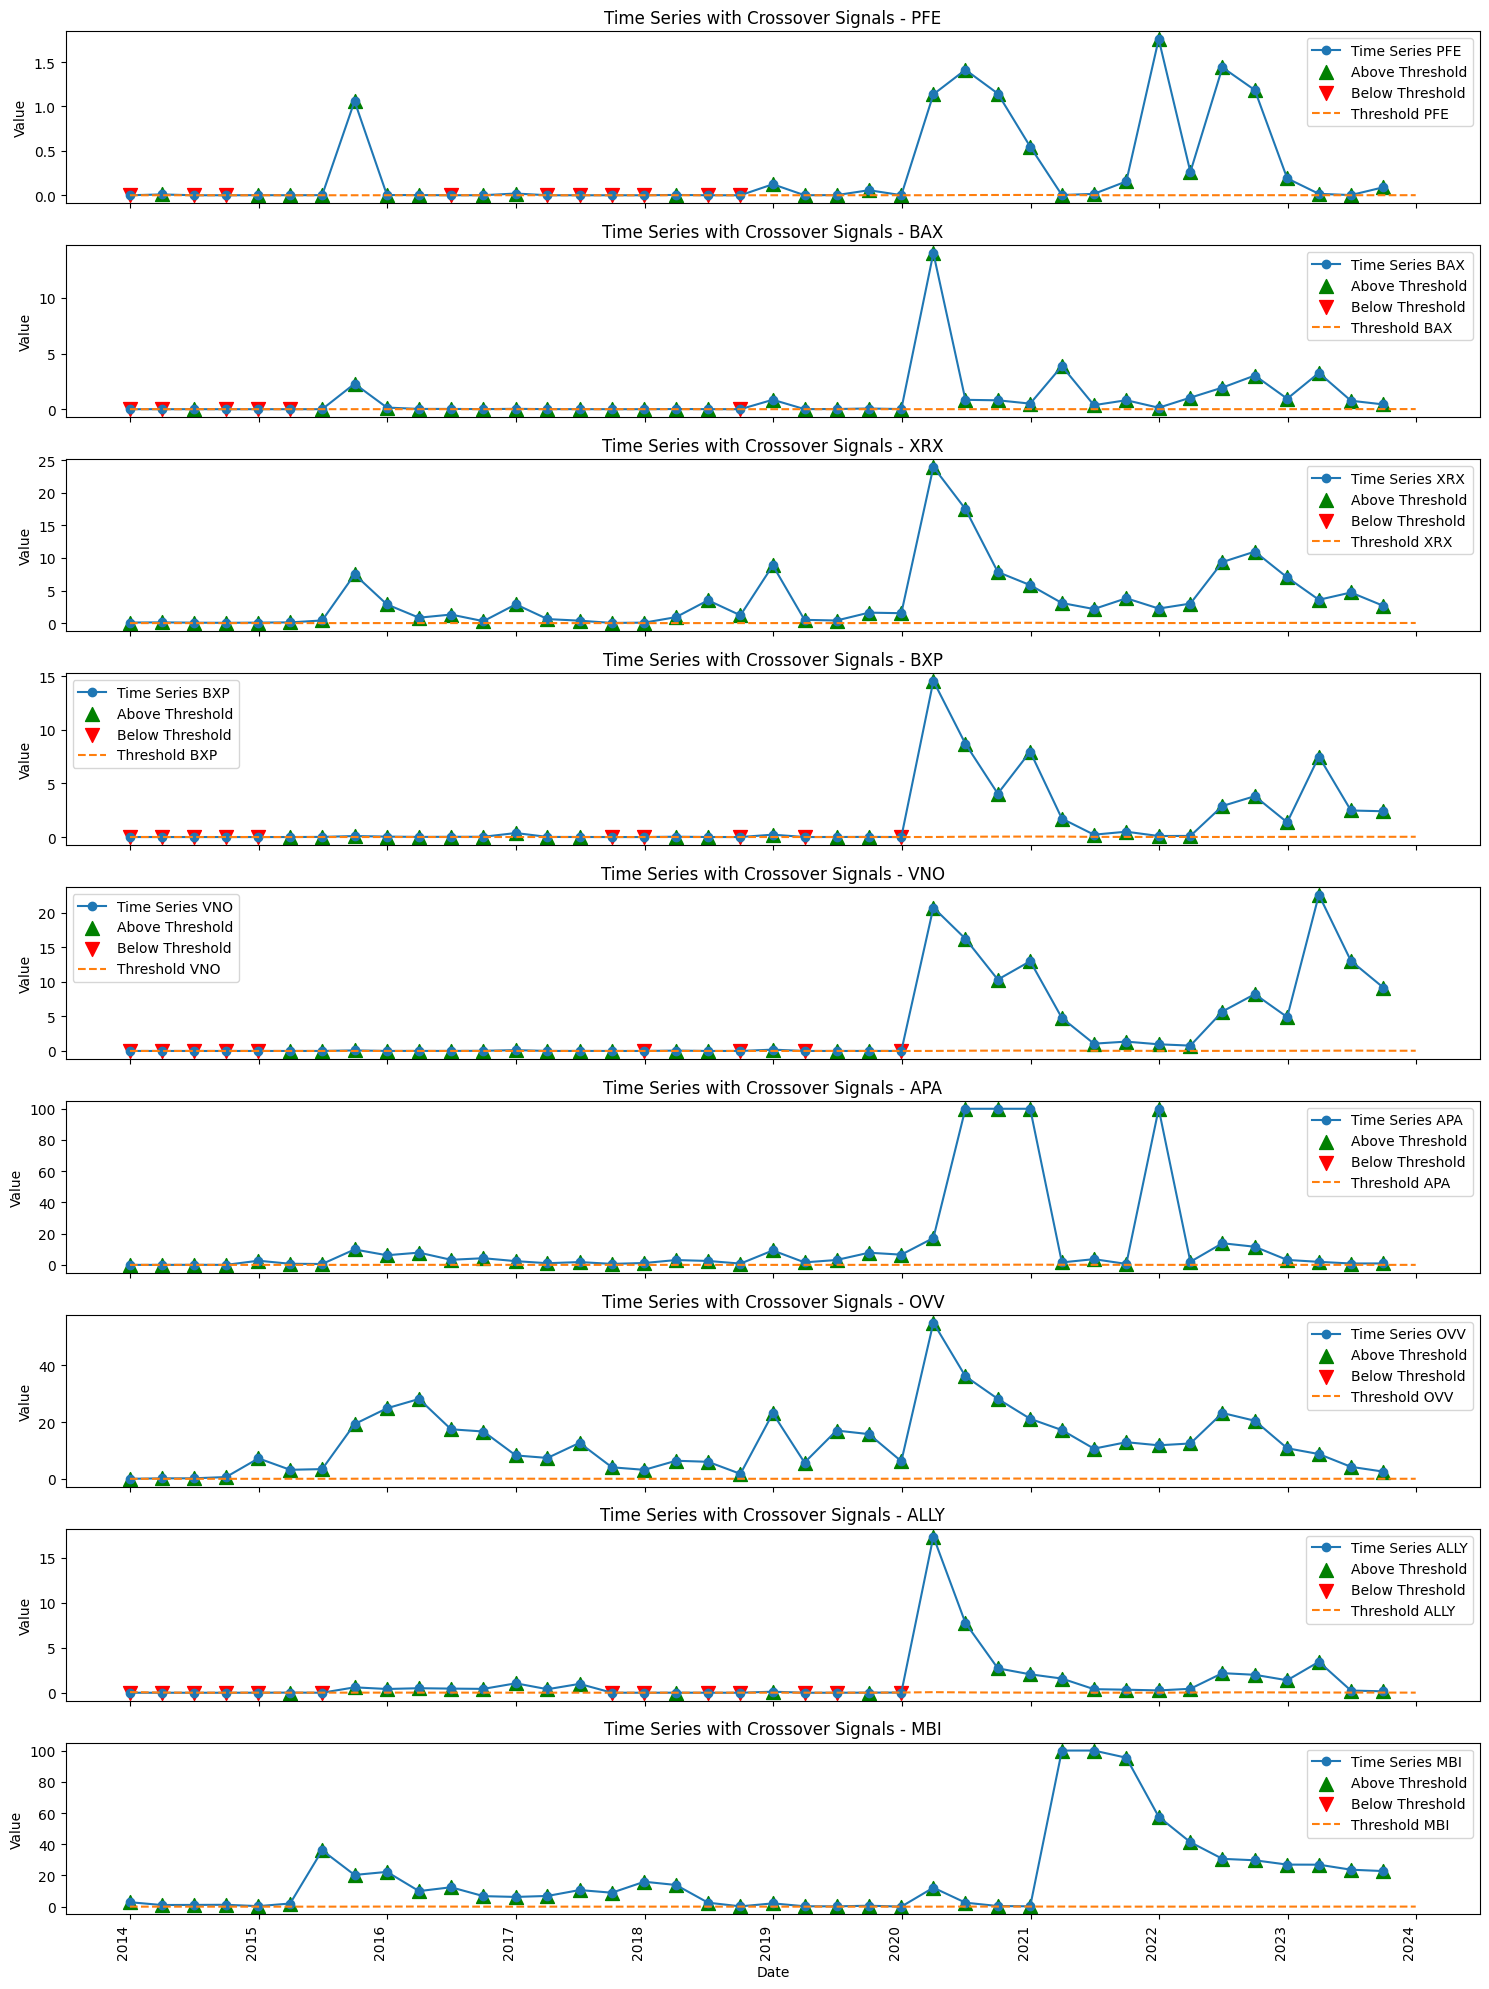

In [ ]:
# Dictionary to store time series data for each company
time_series_data = {}

# Loop through the companies and calculate the time series data
for company in companies:
    time_series_data[company] = default_probs[company].to_numpy()

# Create a figure with 9 subplots
fig, axs = plt.subplots(9, 1, figsize=(15, 20), sharex=True)

# Iterate through columns and create subplots
for i, col in enumerate(column_names):
    # Plot the time series data
    axs[i].plot(default_probs.index, time_series_data[col], label=f'Time Series {col}', marker='o')

    # Plot crossover signals above the threshold
    above_threshold_signals = [value for i, value in enumerate(time_series_data[col]) if above_thresholds_df[col][i]]
    axs[i].scatter(default_probs.index[above_thresholds_df[col]], above_threshold_signals, color='green', label='Above Threshold', marker='^', s=100)

    # Plot crossover signals below the threshold
    below_threshold_signals = [value for i, value in enumerate(time_series_data[col]) if below_thresholds_df[col][i]]
    axs[i].scatter(default_probs.index[below_thresholds_df[col]], below_threshold_signals, color='red', label='Below Threshold', marker='v', s=100)

    # Add a horizontal line at the threshold
    axs[i].plot(thresholds.index, thresholds[col],  linestyle='--', label=f'Threshold {col}')


    # Add labels and title to each subplot
    axs[i].set_ylabel('Value')
    axs[i].set_title(f'Time Series with Crossover Signals - {col}')

    # Display the legend for each subplot
    axs[i].legend()

# Add common x-axis label
axs[-1].set_xlabel('Date')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90, ha='right')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()



In [ ]:
# Black Scholes call
def BS_CALL(S, K, T, r, sigma):
  N = norm.cdf
  d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
  d2 = d1 - sigma * np.sqrt(T)
  return S * N(d1) - K * np.exp(-r*T)* N(d2)

In [ ]:
# Define the company names and corresponding columns in the DataFrame
companies = ['PFE', 'BAX', 'XRX', 'BXP', 'VNO', 'APA', 'OVV', 'ALLY', 'MBI']
columns = {'asset_vol': [2, 5, 8, 11, 14, 17, 20, 23, 26]}

# Initialize lists for equity values and asset volatilities
option_prices = {company: [] for company in companies}

# Loop through the DataFrame and calculate equity values and asset volatilities
for i in range(len(df)):
    for company in companies:
        E_vol = df.iloc[i][columns['asset_vol'][companies.index(company)]]
        r=interest_rate["Interest Rate"].iloc[i]
        equity_price=equity_price_df[company].iloc[i]
        opt_price=BS_CALL(equity_price,equity_price,1/4,r, E_vol)


        option_prices[company].append(opt_price)

# Example: Accessing the results for a specific company
option_prices_df = pd.DataFrame(option_prices)


In [ ]:
temp=(10000/equity_price_df).reset_index(drop=True)
temp.drop(temp.tail(1).index,inplace=True) # drop last n rows
option_premium=temp*option_prices_df

In [ ]:
cds_premium=(cds_spread*25)
cds_premium=cds_premium.reset_index(drop=True)

PFE          BAX           XRX          BXP  VNO           APA  \
0    526.725000   500.650000           NaN          NaN  NaN   1136.050000   
1    549.903390   580.934322   2579.427632  1844.526695  NaN   1475.781132   
2    663.751538   667.205385   2324.211842  1507.850403  NaN   1235.981410   
3    595.493966   701.778879   2214.812755  1488.463235  NaN   1342.205102   
4    524.181250   598.796212   2008.936905  1559.931863  NaN   3109.204730   
5    401.095313   554.908984   1958.924597  1405.211207  NaN   4071.019811   
6    417.616538   830.991154   2510.492692  1374.259375  NaN   2663.273611   
7    609.772414   994.116810   3023.898361  1600.305000  NaN   4179.536058   
8    736.522984  1156.996212   4320.173828          NaN  NaN   4107.690625   
9    471.092578   855.630469   6083.275781          NaN  NaN   6927.806364   
10   614.327692   850.888846   6872.583846          NaN  NaN   4597.024123   
11   600.399167   744.651667   5814.292083          NaN  NaN   4092.235366   
12   942.396154   758.513462   4143.915726          NaN  NaN   3156.769444   
13   957.698828   664.609766   3399.427734          NaN  NaN   2509.888077   
14   735.345000   544.977308   3138.340769          NaN  NaN   2732.128846   
15   592.078462   584.443846   2230.858077  2170.661111  NaN   2688.253077   
16   559.384231   548.905385   3999.374615          NaN  NaN   2321.310000   
17   585.942578   674.033984   2978.338846  1644.375000  NaN   2089.969672   
18   872.362500   814.245089   4123.333077          NaN  NaN   2291.693269   
19   719.632661   785.427419   5228.875000          NaN  NaN   2018.008898   
20   764.870312  1163.531641   7040.037879          NaN  NaN   2939.373770   
21   757.093229  1102.947396   6025.885547          NaN  NaN   3325.686702   
22          NaN          NaN   5606.293846          NaN  NaN           NaN   
23          NaN          NaN   4603.598485          NaN  NaN           NaN   
24          NaN          NaN   4094.146875          NaN  NaN           NaN   
25   981.231667  1035.793750   3914.020565          NaN  NaN  16952.192647   
26   568.206641   472.131855   6781.289844          NaN  NaN  12341.700000   
27   475.944697   424.438462   6887.294231          NaN  NaN   7570.541667   
28   566.165909   482.148864   4864.007692          NaN  NaN   4533.437500   
29   734.744141   675.766393   4443.233197          NaN  NaN           NaN   
30   731.693846   656.970312   5195.883984  2229.693750  NaN   4956.212500   
31   645.510606   736.203516   5630.920703  2188.137500  NaN   5307.700000   
32   678.789407   834.080769   6626.028846          NaN  NaN           NaN   
33   800.248810   963.588750   7233.948387          NaN  NaN   3949.677679   
34  1064.458036          NaN  10755.702823          NaN  NaN   4649.373077   
35   969.326894  1696.761275  11540.557500          NaN  NaN   6311.306061   
36  1065.334615  1735.821311  11013.915341          NaN  NaN   4761.656154   
37  1089.157692  2130.900862   9907.528017          NaN  NaN   4815.419231   
38  1038.985385  2085.613839  10183.909821          NaN  NaN   4958.459231   
39   880.684615  1819.480000   8264.557083          NaN  NaN   3607.278462   

    OVV         ALLY           MBI  
0   NaN  3598.575000  13724.600000  
1   NaN  3391.966797  11378.644048  
2   NaN  3294.783846           NaN  
3   NaN  3700.040909  12684.802381  
4   NaN  4178.166538  11619.878462  
5   NaN  4277.293359  14068.262891  
6   NaN  4439.019615  13489.877308  
7   NaN  4493.061154  18460.123016  
8   NaN  4739.291667  17835.748611  
9   NaN  5271.208333           NaN  
10  NaN  7224.880952  21193.550000  
11  NaN  6083.192187           NaN  
12  NaN  5772.337500  14782.935000  
13  NaN  5178.617593           NaN  
14  NaN  5855.343359  10043.906250  
15  NaN  4391.429717           NaN  
16  NaN          NaN           NaN  
17  NaN  2763.281250  23579.906250  
18  NaN          NaN           NaN  
19  NaN          NaN           NaN  
20  NaN          NaN           NaN  

In [ ]:
companies = ["PFE", "BAX", "XRX", "APA"]

# Dictionary to store pnl and cumulative pnl for each company
pnl_dict = {company: [0] for company in companies}
cum_pnl_dict = {company: [0] for company in companies}

# Iterate through data and calculate pnl
for i in range(len(df)):
    for company in companies:
        if not np.isnan(cds_premium[company].iloc[i]):
            is_below_threshold = below_thresholds_df[company].iloc[i]
            pnl = option_premium[company].iloc[i] - cds_premium[company].iloc[i] if is_below_threshold else cds_premium[company].iloc[i] - option_premium[company].iloc[i]

            # Append pnl and cumulative pnl to the lists
            pnl_dict[company].append(pnl)
            cum_pnl_dict[company].append(pnl + cum_pnl_dict[company][-1])

# Convert lists to NumPy arrays
pnl_dict = {company: np.array(pnl_dict[company]) for company in companies}
cum_pnl_dict = {company: np.array(cum_pnl_dict[company]) for company in companies}

# covert NumPy arrays into Data Frame
max_length = max(len(arr) for arr in pnl_dict.values())

# Fill NaN values and convert to DataFrame
pnl_df = pd.DataFrame({company: np.concatenate([arr, [np.nan] * (max_length - len(arr))]) for company, arr in pnl_dict.items()}, index=df.index)
cum_pnl_df = pd.DataFrame({company: np.concatenate([arr, [np.nan] * (max_length - len(arr))]) for company, arr in cum_pnl_dict.items()}, index=df.index)

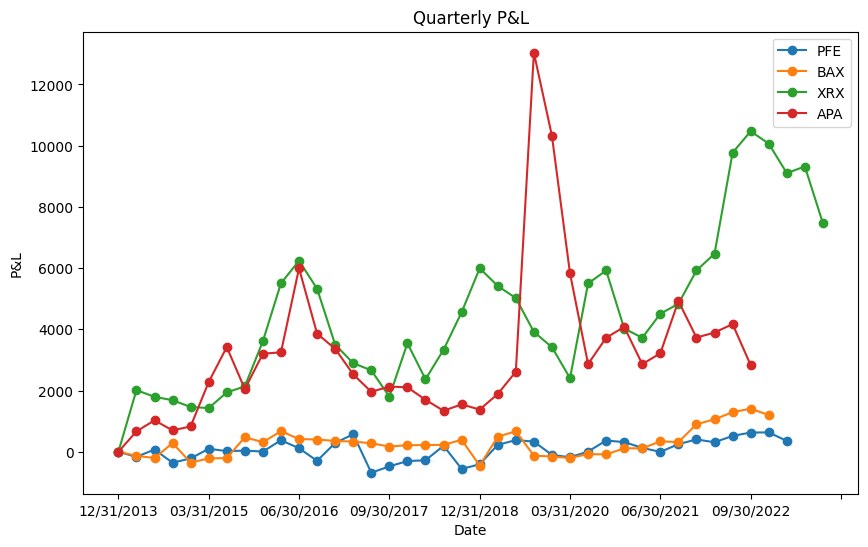

In [ ]:
# Plot pnl_df
pnl_df.plot(figsize=(10, 6), marker='o', title='Quarterly P&L')
plt.xlabel('Date')
plt.ylabel('P&L')
plt.show()
